In [25]:
import pandas as pd

# Exploratory Data Analysis for Intercom Metadata
The aim of this notebook is to take a look at the the survey responses and metadata from customer support chats in Intercom.

In [35]:
data = pd.read_csv('data/metadata_231116.csv')
data = data[data['Inbound/Outbound'] == 'Inbound']
data.head()

,Conversation ID,Conversation URL,Title,Conversation status,Conversation tags,Created at,Last updated at,Last closed at,Time Zone,Inbound/Outbound,...,Teammate rated (name),Channel,Source,Language,External ID,Fin: Preview,Workflow: Preview,Customer reports,Ticket category,Latest workspace phone number
1,36000125353,https://app.intercom.com/a/apps/trq7czv5/inbox...,NaN,Closed,Miscellaneous,2023-08-25 14:24:19,2023-08-25 18:35:30,2023-08-25 18:35:30,America/New_York,Inbound,...,NaN,Desktop,Inbound message,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,36000122525,https://app.intercom.com/a/apps/trq7czv5/inbox...,Invitation,Closed,"General: Log-In/Password, CincyMLS Support",2023-08-25 04:20:49,2023-08-25 09:42:31,2023-08-25 09:42:11,America/New_York,Inbound,...,Jeff Wakeland,Email,Inbound message,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,36000128884,https://app.intercom.com/a/apps/trq7czv5/inbox...,NaN,Closed,Miscellaneous,2023-08-26 15:39:44,2023-08-26 15:58:53,2023-08-26 15:58:53,America/New_York,Inbound,...,NaN,Desktop,Inbound message,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,36000122612,https://app.intercom.com/a/apps/trq7czv5/inbox...,More information please.,Closed,duplicate,2023-08-25 07:10:22,2023-08-25 07:22:46,2023-08-25 07:22:46,America/New_York,Inbound,...,NaN,Email,Inbound message,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,36000133849,https://app.intercom.com/a/apps/trq7czv5/inbox...,CincyMLS: Perchwell RESO API - Clear Capital,Closed,NaN,2023-08-28 14:59:39,2023-08-28 15:35:12,2023-08-28 15:35:12,America/New_York,Inbound,...,NaN,Email,Inbound message,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data['Channel'].unique()

array(['Desktop', 'Email', 'iOS App', 'Android App'], dtype=object)

In [28]:
data.columns

Index(['Conversation ID', 'Conversation URL', 'Title', 'Conversation status',
       'Conversation tags', 'Created at', 'Last updated at', 'Last closed at',
       'Time Zone', 'Inbound/Outbound', 'Reopened', 'Closed',
       'Conversation rating', 'Conversation rating requested',
       'Rating updated at', 'Conversation rating remark',
       'Conversation topics', 'Companies (ID)', 'Companies (name)',
       'Company tags', 'Email', 'Location', 'Name', 'Type',
       'Participated (ID)', 'Participated (name)', 'Participated (email)',
       'People tags', 'User ID', 'Assigned to (ID)', 'Assigned to (name)',
       'Team assigned to (ID)', 'Team assigned to (name)', 'Closed by (ID)',
       'Closed by (name)', 'Teammates participated',
       'Time to first reply (seconds)', 'Time to last close (seconds)',
       'Teammate replies', 'Teammate rated (ID)', 'Teammate rated (name)',
       'Channel', 'Source', 'Language', 'External ID', 'Fin: Preview',
       'Workflow: Preview', 'Custo

In [29]:
data = data[['Conversation ID', 'Conversation status', 'Conversation tags', 
      'Created at', 'Last updated at', 'Last closed at','Inbound/Outbound',
      'Reopened', 'Closed','Conversation rating', 'Conversation rating requested',
      'Rating updated at', 'Conversation rating remark', 'Conversation topics',
      'Companies (ID)', 'Companies (name)', 'Company tags', 'Name', 'Type', 
      'Participated (ID)', 'People tags', 'Assigned to (ID)', 
      'Assigned to (name)', 'Closed by (ID)','Closed by (name)', 
      'Teammates participated', 'Time to first reply (seconds)', 'Time to last close (seconds)',
      'Teammate replies', 'Teammate rated (ID)', 'Teammate rated (name)', 
      'Customer reports', 'Ticket category']]

In [30]:
data['Conversation rating']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11234   NaN
11235   NaN
11236   NaN
11237   NaN
11238   NaN
Name: Conversation rating, Length: 11239, dtype: float64

In [36]:
print(len(data.dropna(subset='Conversation rating')), len(data), len(data.dropna(subset='Conversation rating'))/len(data))

1203 8784 0.1369535519125683


In [32]:
rated_data = data.dropna(subset='Conversation rating')
rated_data.head(10)

,Conversation ID,Conversation status,Conversation tags,Created at,Last updated at,Last closed at,Inbound/Outbound,Reopened,Closed,Conversation rating,...,Closed by (ID),Closed by (name),Teammates participated,Time to first reply (seconds),Time to last close (seconds),Teammate replies,Teammate rated (ID),Teammate rated (name),Customer reports,Ticket category
26,36000130209,Closed,NaN,2023-08-27 11:14:46,2023-08-28 15:22:13,2023-08-28 11:27:45,Inbound,0,1,5.0,...,5635469.0,Amanda Bonicelli,Amanda Bonicelli,350.0,29579.0,1,5635469.0,Amanda Bonicelli,NaN,NaN
84,36000272396,Closed,Internal: Cincy Membership Escalation,2023-10-23 12:32:40,2023-10-24 13:14:34,2023-10-24 12:37:57,Inbound,0,1,4.0,...,5472692.0,Tara Bars,Tara Bars,523.0,32717.0,2,5472692.0,Tara Bars,NaN,NaN
110,36000281368,Closed,General: Log-In/Password,2023-10-26 12:44:09,2023-10-26 12:48:52,2023-10-26 12:48:18,Inbound,0,1,5.0,...,5635469.0,Amanda Bonicelli,Amanda Bonicelli,57.0,249.0,2,5635469.0,Amanda Bonicelli,NaN,NaN
150,36000122322,Closed,NaN,2023-08-24 22:33:50,2023-08-28 12:47:09,2023-08-28 12:40:03,Inbound,0,1,4.0,...,5287721.0,Sara Levi,Sara Levi,696.0,103203.0,6,5287721.0,Sara Levi,NaN,NaN
168,36000238901,Closed,Request: RLS,2023-10-06 16:38:26,2023-10-09 09:16:53,2023-10-06 18:00:05,Inbound,0,1,5.0,...,5472692.0,Tara Bars,Tara Bars,473.0,4894.0,3,5472692.0,Tara Bars,NaN,NaN
183,36000242364,Closed,How to: Manage Listings,2023-10-09 09:15:23,2023-10-09 10:51:28,2023-10-09 10:46:29,Inbound,0,1,5.0,...,6693137.0,Exaviana Tucker,Exaviana Tucker,480.0,5467.0,15,6693137.0,Exaviana Tucker,NaN,NaN
203,36000289799,Closed,"Data Request: Internal Listing, Bug: Geolocation",2023-10-30 12:28:59,2023-10-30 13:23:14,2023-10-30 13:23:14,Inbound,1,2,5.0,...,5635469.0,Amanda Bonicelli,Amanda Bonicelli,479.0,3255.0,4,5635469.0,Amanda Bonicelli,NaN,NaN
204,36000289557,Closed,NaN,2023-10-30 11:03:07,2023-10-30 13:47:52,2023-10-30 13:30:02,Inbound,0,1,3.0,...,6803175.0,Xavier Castillo,Xavier Castillo,1264.0,8816.0,5,6803175.0,Xavier Castillo,NaN,NaN
209,36000283820,Closed,How to: Manage Listings,2023-10-27 11:33:04,2023-10-30 13:29:39,2023-10-30 13:24:23,Inbound,0,1,5.0,...,6691707.0,Arianna Menendez,Arianna Menendez,186.0,82279.0,13,6691707.0,Arianna Menendez,NaN,NaN
230,36000262303,Closed,"Data Request: Internal Listing, How to: Manage...",2023-10-18 16:36:44,2023-10-19 11:55:57,2023-10-19 11:49:28,Inbound,1,2,2.0,...,6693137.0,Exaviana Tucker,Exaviana Tucker,664.0,15164.0,8,6693137.0,Exaviana Tucker,NaN,NaN


In [33]:
rated_data['customer_satsifaction'] = [1 if x >= 4 else 0 for x in rated_data['Conversation rating']]

/var/folders/_3/v349phgn4ljd3jkf3ll9p2cm0000gp/T/ipykernel_59514/351133304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_data['customer_satsifaction'] = [1 if x >= 4 else 0 for x in rated_data['Conversation rating']]


In [34]:
rated_data['customer_satsifaction'].value_counts()

1    943
0    261
Name: customer_satsifaction, dtype: int64

In [12]:
rated_data['customer_satsifaction'].mean()

0.7832225913621262

In [13]:
def get_convo_cat(x):
    try:
        return x.split(':')[0]
    except AttributeError:
        return x

In [14]:
rated_data['convo_cat'] = [get_convo_cat(x) for x in rated_data['Conversation tags']]

/var/folders/_3/v349phgn4ljd3jkf3ll9p2cm0000gp/T/ipykernel_59514/3288624660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_data['convo_cat'] = [get_convo_cat(x) for x in rated_data['Conversation tags']]


In [15]:
rated_data.groupby('convo_cat')['Conversation ID'].nunique().sort_values(ascending=False)

convo_cat
How to                                                     232
Bug                                                         88
How To                                                      60
General Question                                            52
Data Request                                                49
CincyMLS                                                    43
General                                                     41
Cincy                                                       30
Feature Request                                             14
Request                                                      8
Password Reset                                               7
Add Listing                                                  7
Data Feeds                                                   7
duplicate                                                    6
Perchwell Admin Task                                         6
Internal                                     

In [16]:
rated_data[['Time to first reply (seconds)', 'Time to last close (seconds)']].dropna().sort_values('Time to first reply (seconds)')

,Time to first reply (seconds),Time to last close (seconds)
7435,19.0,10181.0
1322,22.0,365.0
1841,24.0,7825.0
9295,26.0,3408.0
5299,27.0,23650.0
...,...,...
3512,27265.0,50378.0
469,27412.0,43939.0
3720,32378.0,323899.0
4889,36590.0,67503.0


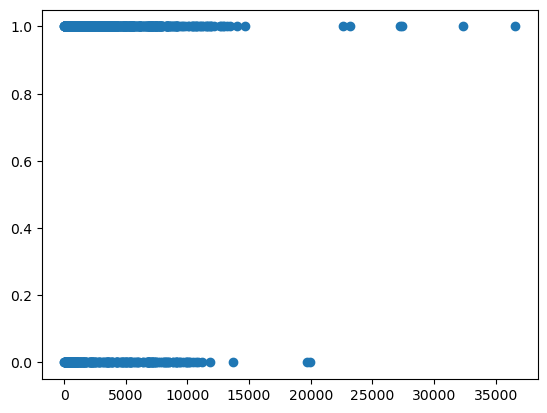

In [17]:
import matplotlib.pyplot as plt
plt.scatter(rated_data[rated_data['Time to first reply (seconds)'] < 530000]['Time to first reply (seconds)'], rated_data[rated_data['Time to first reply (seconds)'] < 530000]['customer_satsifaction'])
plt.show()

In [18]:
def categorize(x):
    if x < 60:
        return '0)0-1 min'
    elif x < 60*5:
        return '1)1-5 min'
    elif x < 60*10:
        return '2)5-10 min'
    elif x < 60*30:
        return '3)10-30 min'
    elif x < 60*60:
        return '4)30-60 min'
    elif x < 60*120:
        return '5)60-120 min'
    else:
        return '6)>120 min'
rated_data['time_to_respond_cat'] = [categorize(x) for x in rated_data['Time to first reply (seconds)']]

/var/folders/_3/v349phgn4ljd3jkf3ll9p2cm0000gp/T/ipykernel_59514/1079990980.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rated_data['time_to_respond_cat'] = [categorize(x) for x in rated_data['Time to first reply (seconds)']]


In [19]:
rated_data.groupby('time_to_respond_cat')['Conversation ID'].nunique()

time_to_respond_cat
0)0-1 min        33
1)1-5 min       224
2)5-10 min      136
3)10-30 min     239
4)30-60 min     155
5)60-120 min    215
6)>120 min      202
Name: Conversation ID, dtype: int64

In [20]:
rated_data.groupby('time_to_respond_cat')['customer_satsifaction'].mean()

time_to_respond_cat
0)0-1 min       0.787879
1)1-5 min       0.866071
2)5-10 min      0.779412
3)10-30 min     0.786611
4)30-60 min     0.780645
5)60-120 min    0.734884
6)>120 min      0.742574
Name: customer_satsifaction, dtype: float64

In [21]:
rated_data.columns

Index(['Conversation ID', 'Conversation status', 'Conversation tags',
       'Created at', 'Last updated at', 'Last closed at', 'Inbound/Outbound',
       'Reopened', 'Closed', 'Conversation rating',
       'Conversation rating requested', 'Rating updated at',
       'Conversation rating remark', 'Conversation topics', 'Companies (ID)',
       'Companies (name)', 'Company tags', 'Name', 'Type', 'Participated (ID)',
       'People tags', 'Assigned to (ID)', 'Assigned to (name)',
       'Closed by (ID)', 'Closed by (name)', 'Teammates participated',
       'Time to first reply (seconds)', 'Time to last close (seconds)',
       'Teammate replies', 'Teammate rated (ID)', 'Teammate rated (name)',
       'Customer reports', 'Ticket category', 'customer_satsifaction',
       'convo_cat', 'time_to_respond_cat'],
      dtype='object')

In [22]:
data[data['Inbound/Outbound'] == 'Inbound'].groupby('Assigned to (name)')['Conversation ID'].nunique()

Assigned to (name)
Alejandra Díaz Valdés      68
Amanda Bonicelli         1691
Arianna Menendez          250
Cincy MLS                 354
Cincy Requests           1427
Clay Watson                69
Darian Irannejad           85
Data Updates                1
Exaviana Tucker          1049
Jeff Wakeland             356
Kynan Rocks                92
Laczy Frazee              478
Leads                       7
Melissa Moore             163
NY Requests               107
RLS Vendor Support         48
Rebecca Levi                1
Sara Levi                 276
Tara Bars                1536
Updates                   151
Xavier Castillo           162
Name: Conversation ID, dtype: int64

In [23]:
rated_data.groupby('Assigned to (name)')['customer_satsifaction'].mean()

Assigned to (name)
Alejandra Díaz Valdés    0.615385
Amanda Bonicelli         0.835443
Arianna Menendez         0.622222
Cincy MLS                0.916667
Cincy Requests           0.760976
Clay Watson              0.888889
Darian Irannejad         1.000000
Exaviana Tucker          0.631206
Jeff Wakeland            0.814815
Kynan Rocks              0.916667
Laczy Frazee             0.750000
Melissa Moore            0.883721
Sara Levi                0.690909
Tara Bars                0.862903
Updates                  0.772727
Xavier Castillo          0.703704
Name: customer_satsifaction, dtype: float64

In [24]:
rated_data['Time to last close (seconds)']

26        29579.0
84        32717.0
110         249.0
150      103203.0
168        4894.0
           ...   
11160     17932.0
11173     71822.0
11192      1391.0
11210      2628.0
11233      1377.0
Name: Time to last close (seconds), Length: 1204, dtype: float64